Wall time: 1min 2s


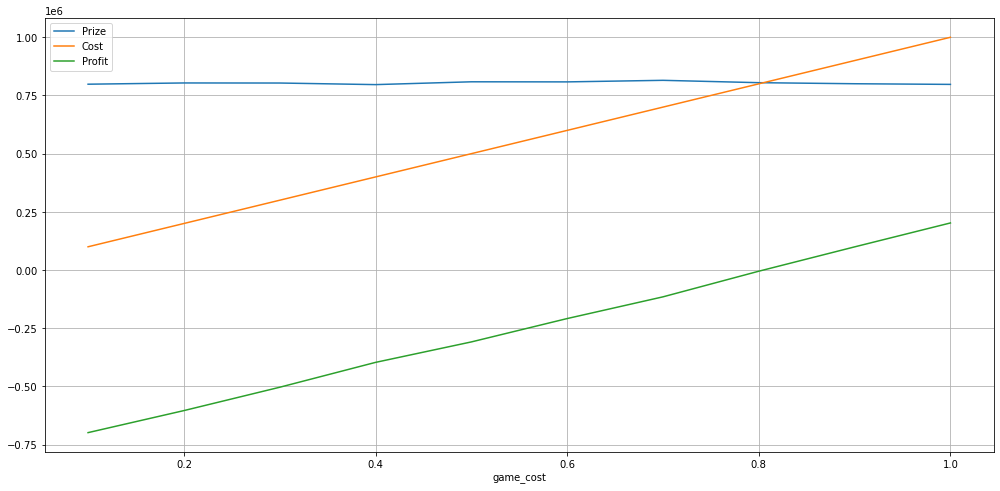

In [247]:
%%time
#Задание, через целочисленное деление. Через строки расчеты были в 3 раза дольше(
#стоимость игры - массив от 0,1 до 1, чтобы посмотреть динамику
#При исходных условиях игра не выгодна. В среднем за одну игру потери составляют 0,2 ед.
#в итоге при игре дешевле 0,8 игрок, в среднем, в выигрыше

import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 17,8

game_count = 10**6
game_cost = np.arange(0.1,1.1,0.1)
total_cost_arr = []
total_prize_arr = []
prize = 0


for cost in game_cost:
    total_cost = 0
    total_prize = 0
    for i in range(game_count):
        res = np.random.randint(0,1000)
        prize = 0

        if res == 777: prize = 200
        elif res == 999: prize = 100
        elif res == 555: prize = 50
        elif res == 333: prize = 15
        elif res == 111: prize = 10
        elif res - (res//100)*100 == 77: prize = 5
        elif res - (res//10)*10 == 7: prize = 3
        elif res%100 == 0: prize = 2
        elif res%10 == 0: prize = 1

        total_prize += prize
        total_cost += cost
        
    total_prize_arr.append(total_prize)
    total_cost_arr.append(total_cost)
    
total_prize_arr

total_profit = np.array(total_cost_arr) - np.array(total_prize_arr)

plt.plot(game_cost, total_prize_arr, label = 'Prize')
plt.plot(game_cost, total_cost_arr, label = 'Cost')
plt.plot(game_cost, total_profit, label = 'Profit')
plt.xlabel('game_cost')
plt.grid()
plt.legend()


In [ ]:
#Расчет
#количество чисел 777, 999, 555, 333, 111 в диапазоне 0...1000 - 10, вероятность каждого  - 0,001
#количество *77 - 10, но в одном случае это 777, итого их 9 и вероятность 0,009
#количество 7 - 100, минус 1х777 и 9х77, итого их 90, вероятность 0,09
#количество *00 - 10, вероятность 0,01
#количество **0 - 100 минус 10 *00, итого их 90, вероятность 0,09

#итоговый выигрыш это сумма произведений вероятностей каждого исхода на их вес (выигрыш)

#0,001*200 + 0,001*100 + 0,001*50 + 0,001*15 + 0,001*10 + 0,009*5 + 0,09*3 + 0,01*2 + 0,09*1 = 0,8
#    777        999         555       333        111        *77       **7      *00     **0